In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# Loading the dataset and displaying its first few rows
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Checking for any missing values in the dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

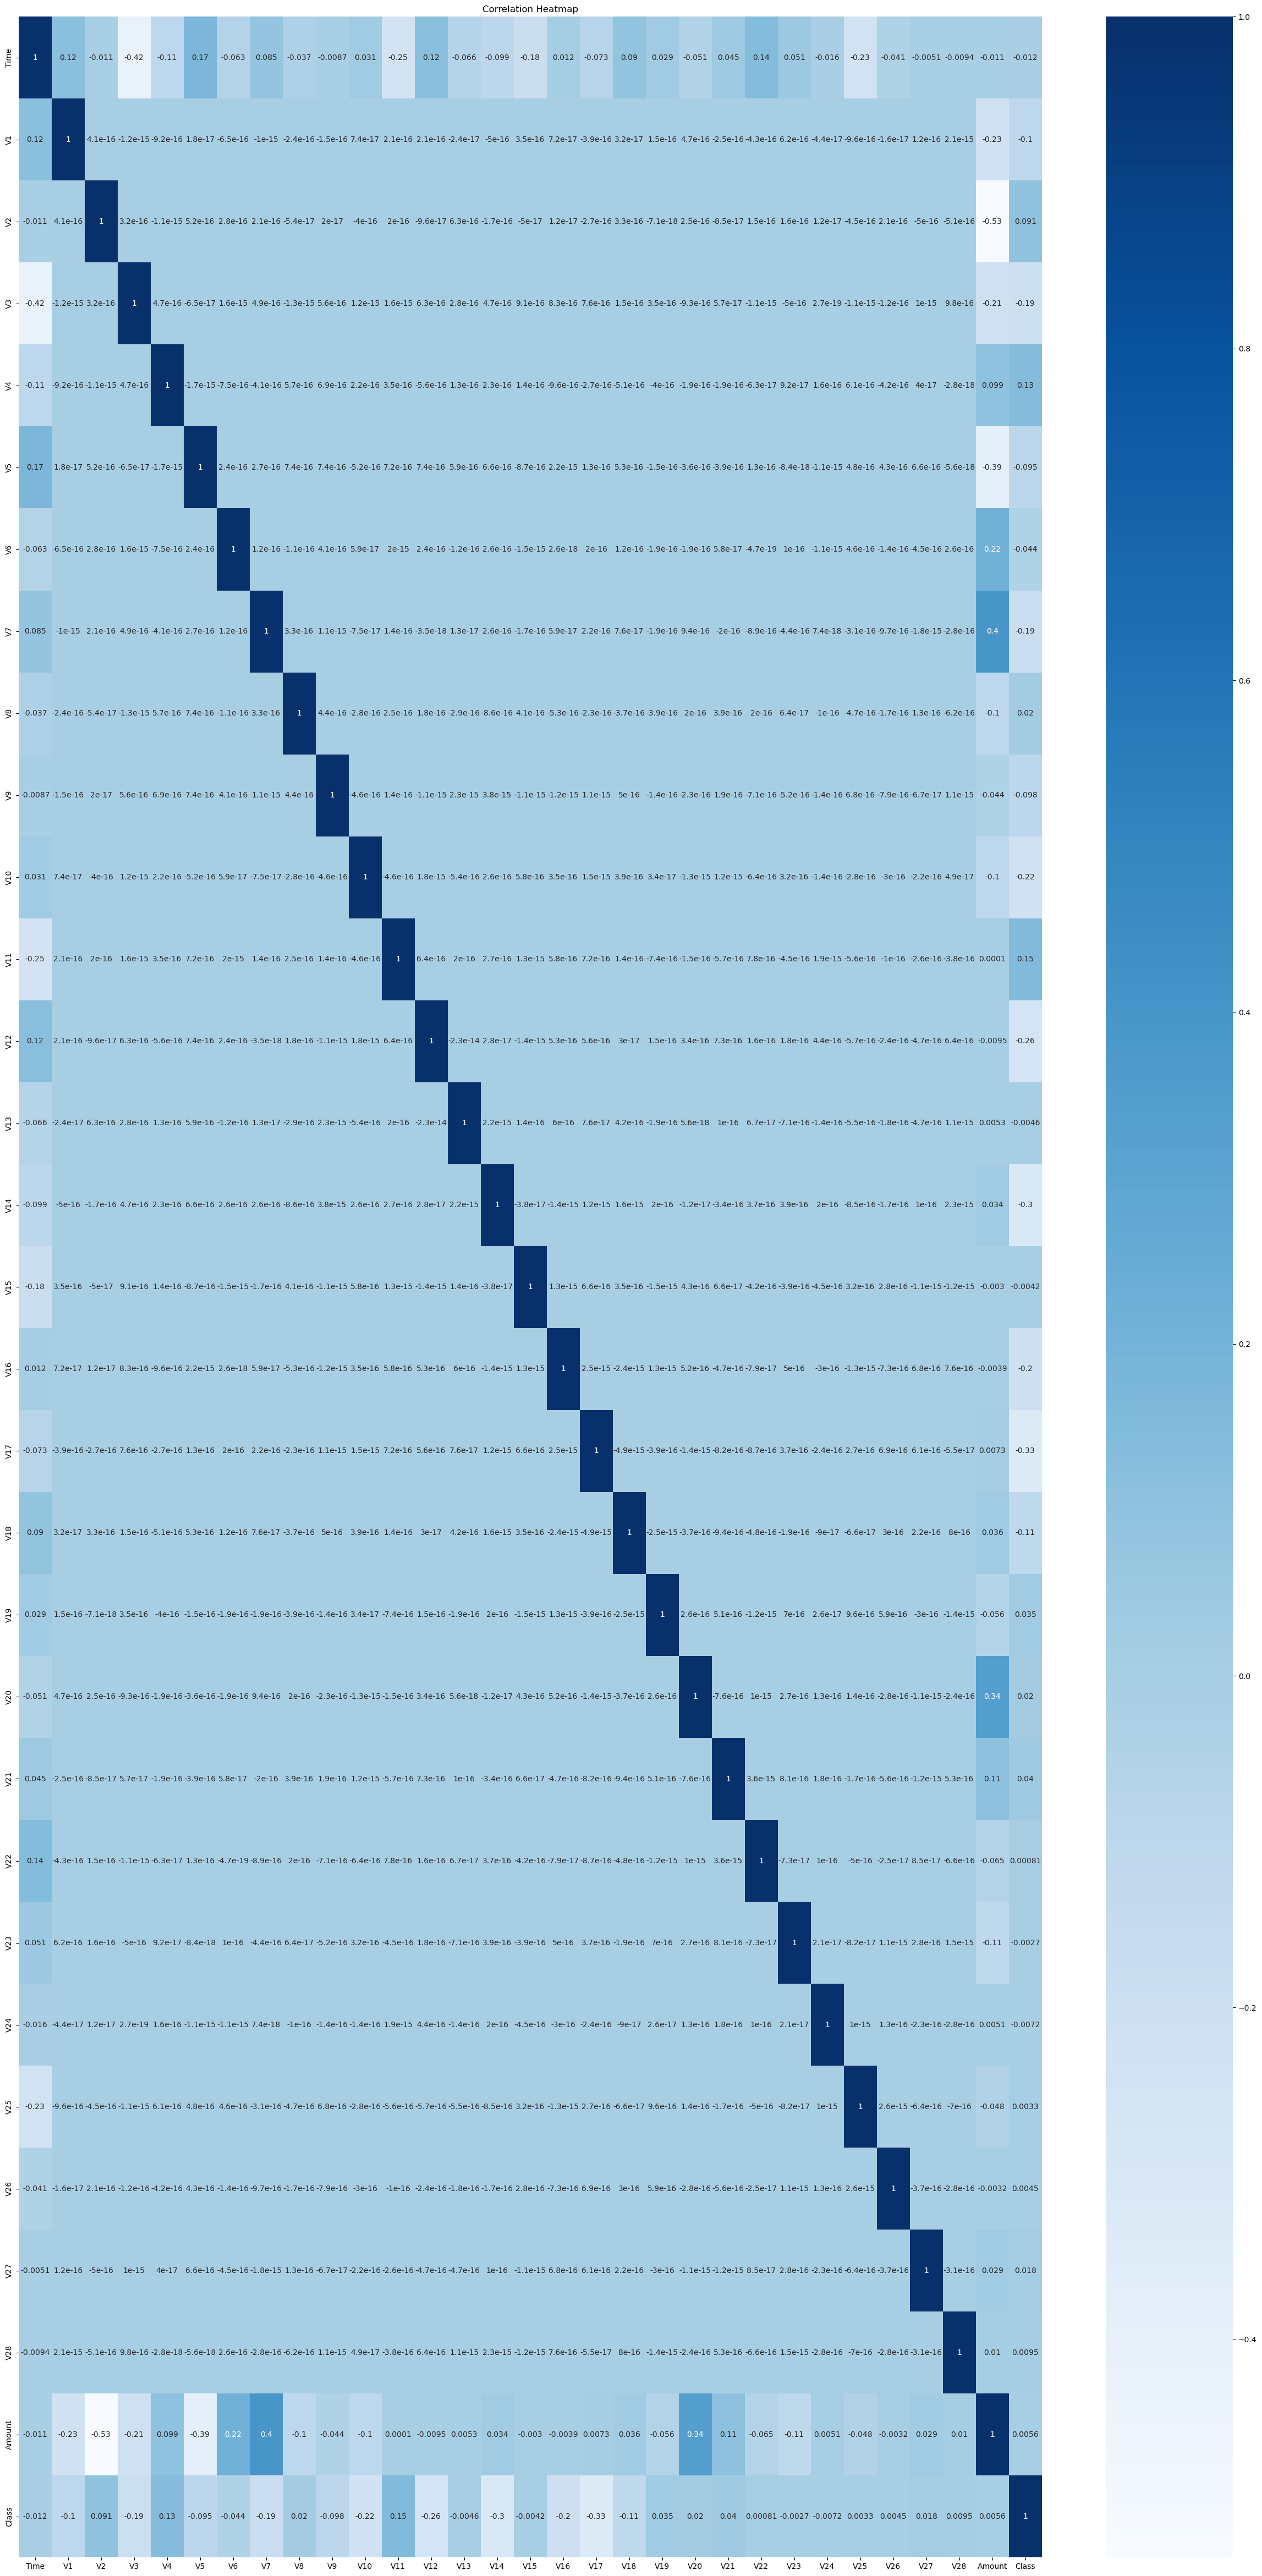

In [3]:
# Checking the correlation among the variables
plt.figure(figsize=(30,60))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')

In [4]:
# Checking the distribution of genuine transactions and fraudulent transactions
# Genuine transaction is denoted by 0
# Fraudulent transaction is denoted by 1 
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
# Separating data for analysis
genuine = df[df.Class == 0]
print(genuine.shape)
fraudulent = df[df.Class == 1]
print(fraudulent.shape)

(284315, 31)
(492, 31)


In [6]:
# Comparing the values of both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
# Since the dataset in highly unbalanced
# It will now be subjected to Undersampling
# Since the number of fraudulent transactions is 492, the number of genuine transactions will also be set to 492
genuine_sample = genuine.sample(492)
# Concatenating the two dataframes to create a new dataset
df2 = pd.concat([genuine_sample, fraudulent], axis=0)
# Displaying the first few rows of the new dataset
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
180211,124431.0,1.994666,0.223835,-1.520798,1.286828,0.470950,-0.870537,0.548556,-0.288919,-0.097205,...,0.105199,0.524917,0.000120,0.029321,0.427184,-0.512113,-0.015442,-0.072179,1.00,0
75587,56140.0,1.225802,-0.077091,-1.184379,0.280735,2.167302,3.613838,-0.413337,0.844117,0.170171,...,-0.171665,-0.491063,-0.143721,1.010874,0.886074,-0.328700,0.021670,0.015839,27.82,0
122251,76493.0,1.213697,0.352180,0.339585,0.570441,-0.252163,-0.730653,0.029979,-0.095110,-0.329654,...,-0.228172,-0.662544,0.108270,0.307764,0.209207,0.074828,-0.022501,0.022107,1.98,0
166217,117933.0,-0.706173,-1.543303,0.937297,-2.653833,0.450297,-0.304366,-1.103360,0.261847,-2.011367,...,0.022287,0.126833,0.044458,0.151038,-0.301542,-0.236774,0.121630,0.168887,17.40,0
13656,24212.0,-0.354571,1.023182,0.887883,-0.576659,1.129744,-0.039816,0.642030,-0.028810,0.597165,...,-0.324201,-0.763998,-0.102438,-1.064041,-0.544814,-0.133239,0.084261,0.150719,1.98,0


In [20]:
# Checking the distribution of genuine transactions and fraudulent transactions in the new dataset
# Genuine transaction is denoted by 0
# Fraudulent transaction is denoted by 1 
df2['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [21]:
# Comparing the values of both transactions in the new dataset
df2.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93768.408537,-0.083922,0.066343,0.033270,0.028142,0.086246,0.164767,-0.064821,0.076309,0.008366,...,-0.019962,-0.006401,0.027010,0.031027,-0.014616,0.008882,-0.030767,-0.041594,0.006195,74.568435
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
# Splitting the data into features (X) and target variable (y)
X = df2.drop(columns='Class', axis=1)
y = df2['Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Initializing and training the linear regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 0 1 1 1 0]


In [24]:
# Evaluating model performance 
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9187817258883249

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        99
           1       0.97      0.87      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



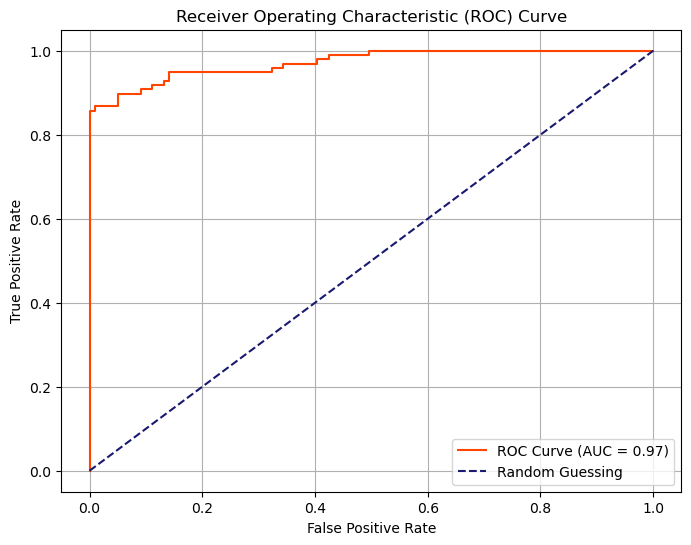

In [25]:
# Get predicted probabilities
y_probs = model.predict_proba(X_test)
# Keep probabilities for the positive outcome only
y_probs = y_probs[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
# A model with an AUC close to 1 indicates better performance
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
# ROC curve is a used to evaluate the performance of binary classification models 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orangered', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='midnightblue', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()